In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving employee_burnout_analysis-AI 2.xlsx to employee_burnout_analysis-AI 2.xlsx


In [48]:
df = pd.read_excel("employee_burnout_analysis-AI 2.xlsx")
print(df)

                    Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2                  3.0   
1        

In [ ]:
print(df.tail(10))

                    Employee ID Date of Joining  Gender Company Type  \
22740  fffe33003300380031003100      2008-09-05  Female      Product   
22741  fffe31003600350034003800      2008-01-07    Male      Product   
22742  fffe33003200310039003000      2008-07-28    Male      Product   
22743      fffe3300390030003600      2008-12-15  Female      Product   
22744  fffe32003500370033003200      2008-05-27    Male      Product   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
22740                  No            3                  6.0   
22741                  No            2                  5.0   
22742             

In [35]:
df["Company Type"].unique()

array(['Service', 'Product'], dtype=object)

In [44]:
df.shape
df.isnull().sum().values.sum()
df.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [33]:
df.isnull().sum()

,0
Employee ID,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [32]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  int64  
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ MB


In [30]:
df.isnull().sum().values.sum()

4622

In [ ]:
df = df.dropna()

In [6]:
X = df.drop('Burn Rate', axis=1)
y = df['Burn Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
scaler = StandardScaler()

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Burn Rate               1.000000
Name: Burn Rate, dtype: float64


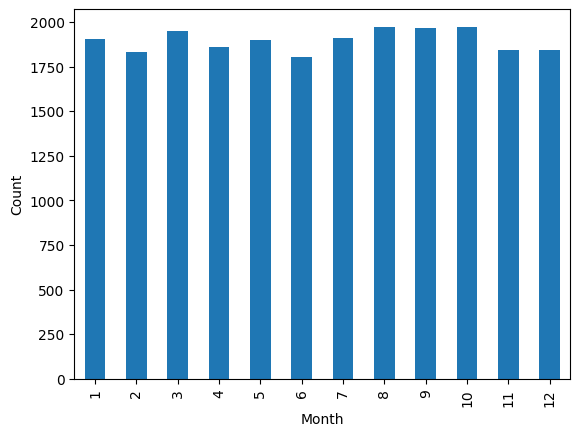

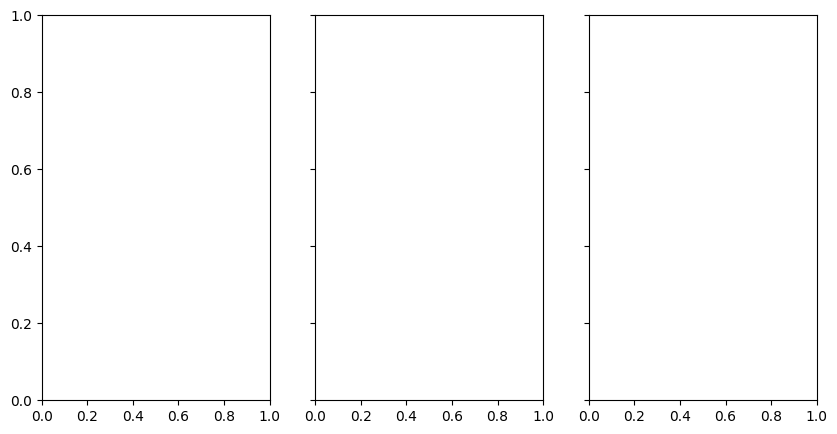

In [49]:
df = df.drop('Employee ID', axis = 1)
data_month = df.copy()
data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel ='Month', ylabel = 'Count')
numeric_data = df.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)
df.corr(numeric_only=True)['Burn Rate'][:]
cat_columns = df.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10 , 5))
if all(col in df.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
  df = pd.get_dummies(df, columns=['Company Type', 'WFH Setup Available', 'Gender'], drop_first=True)
  df.head()
  encoded_columns = df.columns
else:
  print("Error: One or more columns not found in the DataFrame.")
  print(df.columns)





In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
df = df.drop('Date of Joining', axis=1)

In [17]:
y = df['Burn Rate']
X = df.drop(['Burn Rate'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

In [21]:
scaler = StandardScaler()

In [60]:
scaler.fit(X_train)
x_train = pd.Dataframe(scaler.transform(X_train), index=X_train.index, columns= X_train.columns)
x_test = pd.Dataframe(scaler.transform(X_test), index=X_test.index, columns= X_test.columns)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)

In [61]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)
print('Linear Regression Model Performance Metrics:\n')
y_pred = linear_regression_model.predict(X_test)

NameError: name 'LinearRegression' is not defined

In [57]:

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)




NameError: name 'linear_regression_model' is not defined

In [63]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [64]:
from sklearn.datasets import load_iris
data = load_iris()

AttributeError: 'DataFrame' object has no attribute 'data'

NameError: name 'accuracy_score' is not defined